# Explore
* Univariate Stats
    * Look for each one's distrubution with a histogram
* Write out questions/initial assumptions
* Bivariate Stats
    * Look at each one compared to the target
    * Run tests (spearmanr or pearsonr) based on the relatioships and answer questions
* Run statistical tests to confirm a

In [45]:
# imports
from wrangle import wrangle_zillow
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [2]:
# GETTING WRANGLED DATA
train,validate, test = wrangle_zillow()

In [3]:
train.head()

,beds,baths,square_feet,tax_value
45556,4.0,2.5,2453.0,223456.0
36590,4.0,4.0,3109.0,442694.0
42832,3.0,1.0,1090.0,436161.0
23832,3.0,2.0,1673.0,575452.0
32934,4.0,3.0,1826.0,108984.0


## Initial Questions:
* beds: 
* baths:
* square_feet:
* tax_value: 

In [10]:
# creating a function to sepearate categorical variables and numerical variables
def determine_variable_type(train, n_unique = 10):
    '''
    Arguments: a train dataset
    Actions:
        1. Assigns columns names to categorical columns list or numerical columns list
            a. Categorical columns: the datatype is object or there are less than 10 unique values 
            b. Numerical columns: the datatype is not an object and thhere are 10 or more unique values
    Returns: categorical_column_list, numerical_column_list
    '''
    # list comprehension that determines a col is  categorical if the data type is an object or there are less than 10 values
    cat_col = [col for col in train if train[col].dtype == 'O' or train[col].nunique() < n_unique]
    
    # list comprehension that complements the above
    num_col = [col for col in train if train[col].dtype != 'O' and train[col].nunique() >= n_unique]
    
    # full list of variables to explore
    explore_col = cat_col + num_col
    
    return explore_col, cat_col, num_col

In [15]:
def univariate_stats(train):
    '''
    Parameters: *only* a train dataset as an argument
    Actions:
        1. Creates univariate datavisuals for all variables in the dataset
        2. Displays summary statistics for variables with more than 5 unique values
    Returns: prints summary stats and graphs to understand the data
    Modules: 
        1. import searborn as sns
        2. import matplotlib.pyplot as plt
    '''
    explore_col, cat_col, num_col = determine_variable_type(train)
    
    for col in explore_col:
        if col in cat_col:
            sns.countplot(data=train, x=col,)
            plt.title(f'Barplot of {col.capitalize()}')
            plt.show()
            print(f'Value Frequency of {col.capitalize()}')
            print(pd.concat([train[col].value_counts(),
            train[col].value_counts(normalize=True)],
                 axis=1))
            print('\n\n------------------------------------------------------------------------------------------\n------------------------------------------------------------------------------------------\n\n')
        elif col in num_col:
            plt.subplot(121)
            plt.hist(train[col], ec='black')
            plt.title(f'Histogram of {col.capitalize()}')
            
            plt.subplot(122)
            sns.boxplot(data=train, x=col)
            plt.title(f'Boxplot of {col.capitalize()}')
            plt.show()
            
            print(f'Summary statistics of {col.capitalize()}:\n')
            print(train[col].describe())
            print('\n\n------------------------------------------------------------------------------------------\n------------------------------------------------------------------------------------------\n\n')
    return

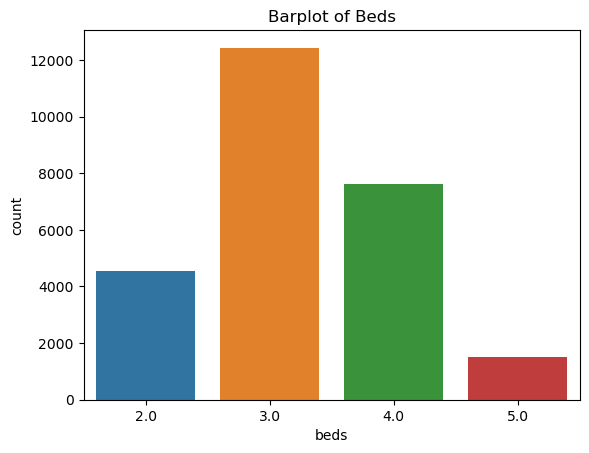

Value Frequency of Beds
      beds      beds
3.0  12433  0.476762
4.0   7606  0.291663
2.0   4536  0.173940
5.0   1503  0.057635


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




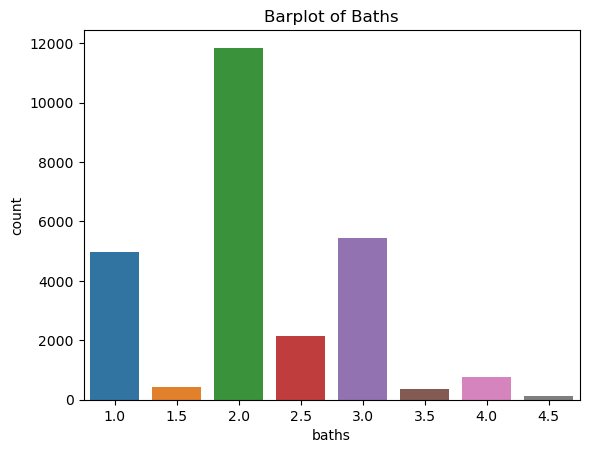

Value Frequency of Baths
     baths     baths
2.0  11850  0.454406
3.0   5440  0.208605
1.0   4963  0.190314
2.5   2160  0.082828
4.0    749  0.028722
1.5    445  0.017064
3.5    357  0.013690
4.5    114  0.004372


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




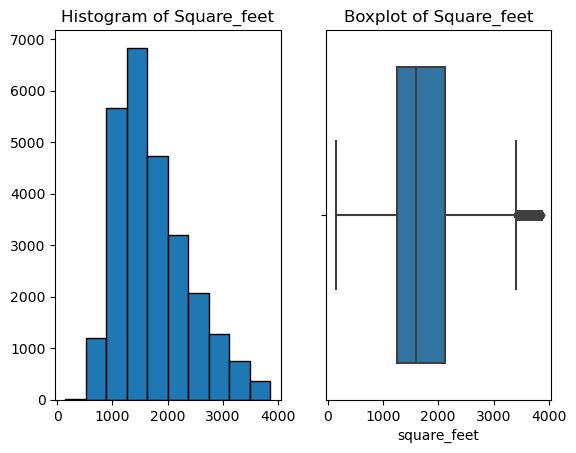

Summary statistics of Square_feet:

count    26078.000000
mean      1739.409771
std        649.913227
min        152.000000
25%       1248.000000
50%       1595.000000
75%       2115.000000
max       3858.000000
Name: square_feet, dtype: float64


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




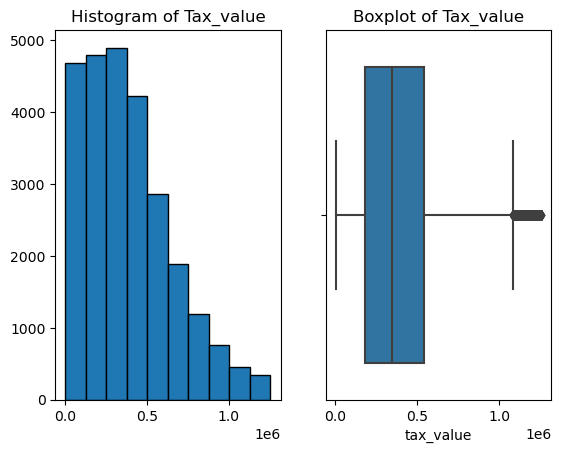

Summary statistics of Tax_value:

count    2.607800e+04
mean     3.889821e+05
std      2.645876e+05
min      3.254000e+03
25%      1.773628e+05
50%      3.441285e+05
75%      5.405710e+05
max      1.255500e+06
Name: tax_value, dtype: float64


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




In [16]:
univariate_stats(train)

##### Takeaways:
* Beds: The majprity of homes have 3 bedrooms which makeup 48% of the data - almost half
* Bathrooms: The majority have 2 bathrooms, roughly 45%
    * Future: Look into the difference between half baths and full baths
* Square Feet: Avg is 1739 square feet, the minimum is 152 which appears to be an incorrect input based on the others - we may need to return to get rid of this
    * Future: get rid of the very low square feet - this is likely a data entry error so any gues as to its value will be incorrect and it will incorrectly effect our data 
    * Realization: Right skewed continuous variables(always positive) are more prone to lower limit outlier misses than discrete postivie variables 
* Tax Value: We have the same problem here as with square feet, minimum is far too low, but also there are challenges with viewing it in the histogram as they are lumped together. There are also home with very high price values that may be of concern, but I think keeping them in the dataset will be useful because they are likely correct. 
    * An inspection of the the data should be done and a comparison of their values and the values of of propoerties with similar features should be done to see if they are properties with mistakes in their tax value amounts

## What is the relationship between squarefeet and tax value?

In [31]:
plot_data = train.sample(1000)

In [32]:
plot_data = train.sample(1000)
target = 'tax_value'
col='square_feet'

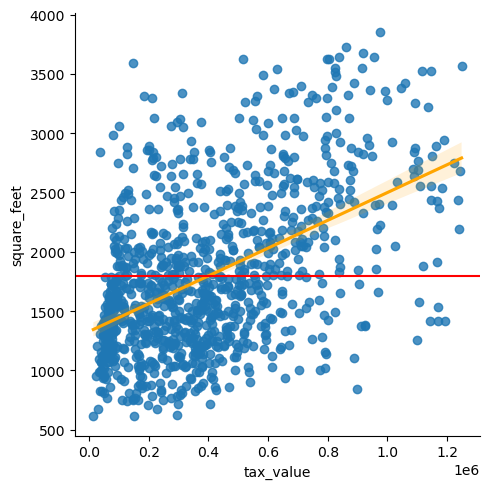

In [46]:
col='square_feet'
sns.lmplot(data=plot_data,
           x=target,
           y=col, line_kws={'color': 'orange'})
plt.axhline(plot_data[col].mean(), c='r')
# plt.legend()
plt.show()

##### Takeaways:
* *Square feet and tax value:* There appears to be a positive linear correlation between square_feet and tax_value, but it does not appear to be very strong. 

##### Ideas:
* Fip codes:
    * It may be of interest to only focus on houses in a certain 'fip' code. This may greatly impact the findings. 
    * Pull in data that includes the fips, create 3 masks based on the locations of each, and explotre the impact. For now, we will continue

#### Hypothesis Testing:
>- Pearsons-r: SquareFeet is normally distributed
>- H$_0$: There is no linear relationship between squarefeet and taxvalue.
>- H$_a$: There is a linear relationship between square feet and tax value.
>- Confidence Interval: 95%
>- $a$: 0.05

In [51]:
# running pearsonsr and assigning variables
r, p = stats.pearsonr(train[col], train[target]) #.confidence_interval()

In [54]:
r, p, stats.pearsonr(train[col], train[target]).confidence_interval()

(0.4756463768149582,
 0.0,
 ConfidenceInterval(low=0.46620064510509174, high=0.4849836747832671))

### What is the relationship between bedroom count and tax value?

Beds x Tax Value

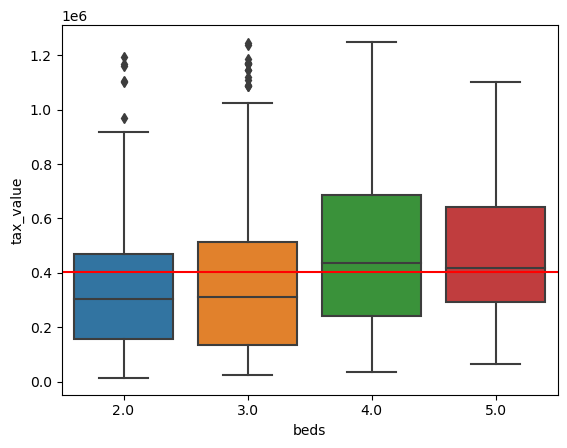

In [39]:
col = 'beds'
sns.boxplot(data=plot_data,
           x=col,
           y=target)
plt.axhline(plot_data[target].mean(), c='r')
plt.show()

##### Takeaways:
* **Bedrooms and tax value:** 
    * Low bedroom count(2 and 3) and high tax value counts - liklely outliers due to mistake with data entry
    * Average home price has an increase when over 3 bedrooms

### What is the relationship between bathroom count and tax value?

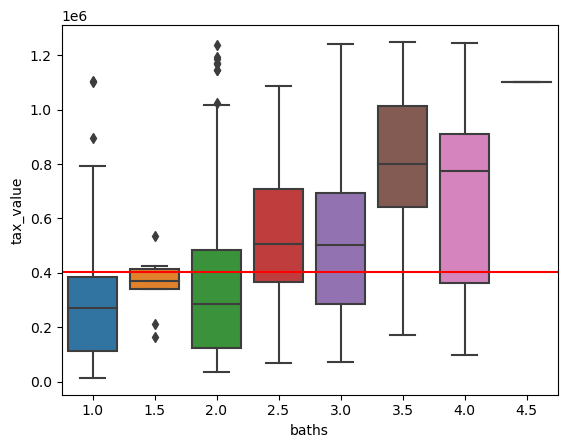

In [38]:
col = 'baths'
sns.boxplot(data=plot_data,
           x=col,
           y=target)
plt.axhline(plot_data[target].mean(), c='r')
plt.show()

##### Takeaways:
* *Bathrooms and tax value:* 
    * For properties with 2, 1.5, and 1 bathrooms, it seems that there has indeed been a mistake with the prices. I may be wrong, but I highly doubt that there are homes with values over 800k and only 1 bathroom. 
    * There seems to be a relationship with having a half bathroom and a large increase in home tax value. 
    
##### Ideas:
* *Half-Baths:* 
    * I think it may be of interest to separate the homes into homes with half bathrooms and home without half bathrooms. This will likely provide a more robust prediction when we use a linear regression model
    * When looking at the half bathrooms, they make up roughly 10% of the data. I think it would be useufl to segment these out for sure for a more robust measure
* *Low-Baths/HighTaxValue Outlier:*
   * Look into the homes that contain outlier tax values with low bathroom counts
   
##### Actions: 
* Plot the tax value of properties with half bathrooms
* Plot the tax value of homes with full bathrooms

### Is there a difference between half-bathroom tax value and full-bathroom tax value?

In [56]:
col = 'baths'

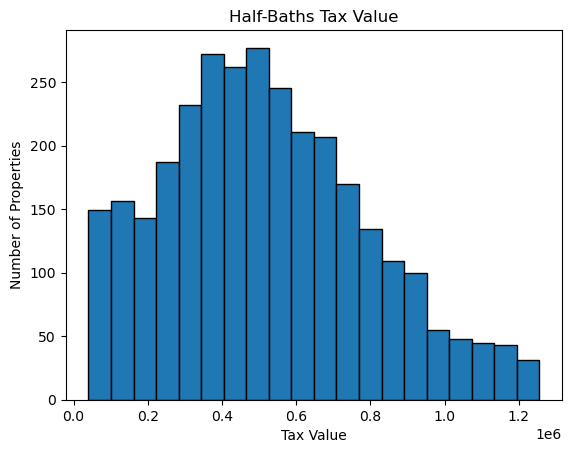

In [109]:
# create variable
half_bath_value = train[train['baths'].astype(str).str[-1] == '5'].tax_value

# plot
half_bath_value.hist(bins=20, ec='black')
plt.title('Half-Baths Tax Value')
plt.xlabel('Tax Value')
plt.ylabel('Number of Properties')
plt.grid(visible=False)

In [114]:
ks, p = stats.kstest(half_bath_tax, 'norm')
p

0.0

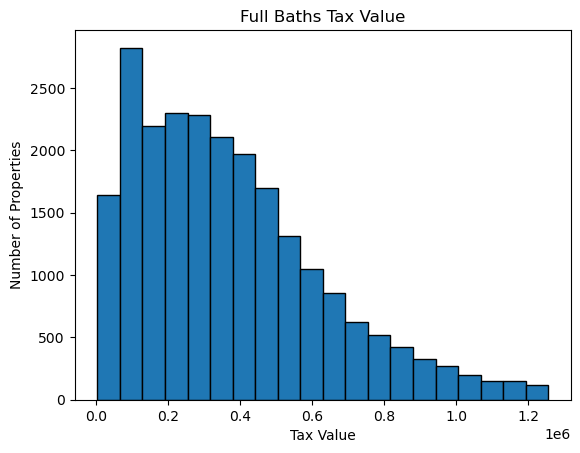

In [104]:
# create variable
full_bath_tax_value = train[train[col].astype(str).str[-1] != '5'].tax_value

# plot variable
full_bath_tax_value.hist(bins=20, ec='black')
plt.title('Full Baths Tax Value')
plt.xlabel('Tax Value')
plt.ylabel('Number of Properties')
plt.grid(visible=False)

In [113]:
ks, p = stats.kstest(full_bath_tax_value, 'norm')
p

0.0

##### Takeaways:
* Both are not normal, we cannot use the ttest, we must us ethe manns whitney test 

#### Hypothesis Testing:
>- Mann-Whitney Test: They are not normally distributed
>- H$_0$: The tax value of homes with halfbathrooms is less than the tax value of homes without half bathrooms.
>- H$_a$: The tax value of homes with half-bathrooms is greater than the tax value of homes without half bathrooms.
>- Confidence Interval: 95%
>- $a$: 0.05

In [111]:
mw, p = stats.mannwhitneyu(full_bath_tax_value, half_bath_value)
mw, p

(23688708.0, 3.1393477345463818e-195)

##### Actions:
* Go through and take out the homes with half bathrooms. There is a significant difference between half-bath and full-bath observations